# Adat felfedezés ingatlan.com-os adathalmazon

A futtatáshoz szükség van egy `.env` fájlra, ami az adathalmaz (szerzői jogi) érzékenysége miatt külön férhető hozzá

## Importok

In [2]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

## Adat letöltés/betöltés

In [4]:
resp = requests.get(os.environ["DATA_BASE_URL"] + "extracted_data-no_text.jsonl")
df = pd.read_json(resp.text, lines=True)
df.head()

/tmp/ipykernel_281221/1569557511.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(resp.text, lines=True)


,accessible,air_conditioning,attic,bath_and_wc,buildability,building_levels,ceiling_height,comfort,date,electricity,...,property_lotSize,property_subtype,property_type,room_count,seller_id,service_charge,type,view,water,year_built
0,None,None,None,None,None,None,None,None,2024-09-11 10:29:17,None,...,2640.0,industrialSite,industrial,NaN,9123.0,None,rent,None,None,None
1,None,None,None,None,None,None,None,None,2024-09-13 22:42:47,None,...,4940.0,arableLand,agricultural,NaN,70766.0,None,sale,None,None,None
2,None,None,None,None,30%,None,None,None,2024-09-12 09:14:46,None,...,1985.0,plotInResidentialArea,plot,NaN,77095.0,None,sale,panorámás,None,None
3,None,van,None,None,None,5,None,None,2024-09-13 22:10:07,None,...,NaN,None,None,NaN,117386.0,None,sale,None,None,2001 és 2010 között
4,None,None,None,None,1%,None,None,None,2024-09-20 17:47:03,None,...,6000.0,otherPlot,plot,NaN,23222.0,None,sale,nincs megadva,None,None


## Adat felderítés

null értékek rendezgetése

In [5]:
df = df.replace('nincs megadva', None).replace('', None)

In [6]:
print(df.notnull().sum())

accessible                   5009
air_conditioning            17966
attic                           1
bath_and_wc                    35
buildability                 2933
building_levels             28241
ceiling_height               9190
comfort                     26951
date                        61465
electricity                  2109
elevator                    11386
energy_certificate            990
floor                       15706
floor_area_ratio              187
furnished                    2471
gross_floor_area              187
id                          61465
location                    61464
min_lease_time               3168
move_in                      3072
nonEuroPrice_amount         61414
nonEuroPrice_currency       61414
office_building_category      557
parking_lots                   67
property_areaSize           50849
property_condition          44453
property_energySaving       11977
property_lotSize            19001
property_subtype            52480
property_type 

Mennyi adatunk van az egyes évekből

<Axes: xlabel='year_of_date'>

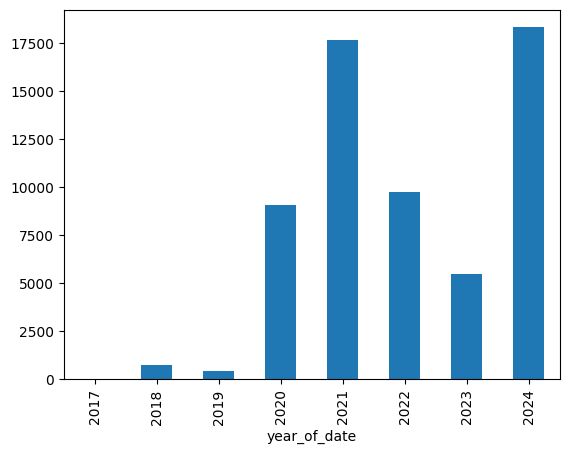

In [7]:
df['year_of_date'] = df['date'].apply(lambda x: x.year)
df['year_of_date'].value_counts().sort_index().plot(kind='bar')

Az ingatlanok fajtái

In [8]:
df['property_type'].value_counts()

property_type
house                  13304
lakás                  10672
ház                     9750
telek                   3030
plot                    3023
flat                    2456
üzlethelyiség           1172
ipari                   1065
iroda                   1034
holiday                  810
raktár                   775
industrial               759
vendéglátás              689
mezőgazdasági            663
nyaraló                  656
agricultural             599
shop                     378
fejlesztési terület      355
warehouse                317
developmentArea          251
catering                 248
office                   231
garázs                   175
garage                    31
intézmény                 23
institute                 14
Name: count, dtype: int64

Mennyi hirdetés eladó/kiadó

In [9]:
df['type'].value_counts()

type
sale     29048
Eladó    25879
Kiadó     4180
rent      2357
Name: count, dtype: int64

Most csak a lakások érdekelnek

In [10]:
# filter property_type
df = df[df['property_type'].isin(['lakás', 'flat'])]
df = df[df['type'].isin(['sale', 'Eladó'])]
df = df[df['nonEuroPrice_currency'].isin(['HUF'])]

Számoljuk ki a négyzetméter árat!

In [11]:
df['nmar'] = df['nonEuroPrice_amount']/df['property_areaSize']

In [12]:
df

,accessible,air_conditioning,attic,bath_and_wc,buildability,building_levels,ceiling_height,comfort,date,electricity,...,property_type,room_count,seller_id,service_charge,type,view,water,year_built,year_of_date,nmar
20964,None,van,None,None,None,4,3 m-nél magasabb,duplakomfortos,2023-03-22 16:21:18,None,...,flat,3.0,NaN,None,sale,street,None,2014,2023,1.502463e+06
20977,None,van,None,None,None,None,None,luxus,2023-03-22 19:40:30,None,...,flat,3.0,NaN,None,sale,street,None,None,2023,1.647727e+06
20981,None,None,None,None,None,None,None,None,2023-04-01 09:55:20,None,...,flat,2.0,NaN,None,sale,garden,None,2011,2023,1.360000e+06
20988,None,nincs,None,None,None,4,3 m-nél alacsonyabb,duplakomfortos,2023-03-22 15:20:34,None,...,flat,30.0,NaN,None,sale,street,None,2001 és 2010 között,2023,7.636364e+05
20990,None,None,None,None,None,7,None,összkomfortos,2023-03-22 19:54:10,None,...,flat,2.0,NaN,None,sale,street,None,None,2023,1.339286e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61459,None,nincs,None,None,None,None,3 m-nél alacsonyabb,összkomfortos,2017-11-22 21:49:48,None,...,lakás,NaN,NaN,None,Eladó,None,None,None,2017,6.060000e+05
61460,None,van,None,None,None,10,3 m-nél alacsonyabb,komfortos,2017-10-22 15:16:14,None,...,lakás,NaN,NaN,None,Eladó,None,None,None,2017,5.285714e+05
61461,None,van,None,None,None,2,None,luxus,2017-10-22 15:16:29,None,...,lakás,NaN,NaN,None,Eladó,None,None,None,2017,3.766234e+05
61463,None,None,None,None,None,None,3 m vagy magasabb,összkomfortos,2017-08-19 22:29:32,None,...,lakás,NaN,NaN,None,Eladó,None,None,None,2017,8.919540e+05


Éves átlagok

In [13]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

yearly_avg = df.groupby('year')['nmar'].mean().reset_index()

<Axes: xlabel='year'>

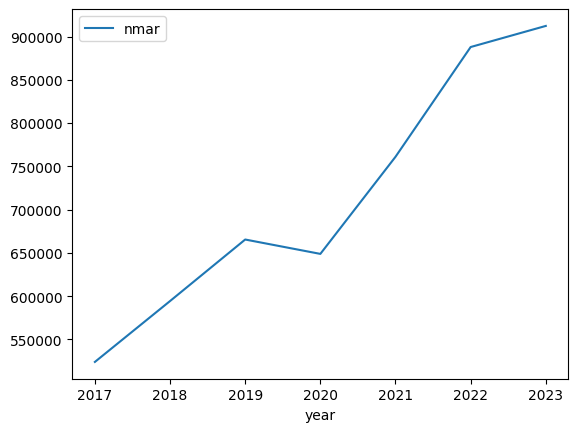

In [14]:
yearly_avg.plot(x='year', y='nmar')